# Wine Quality Prediction

In [7]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Rows and Columns
df=pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [11]:
#describing the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [12]:
#Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# Visualization of our Dataset


# Countplot


<Axes: xlabel='quality', ylabel='count'>

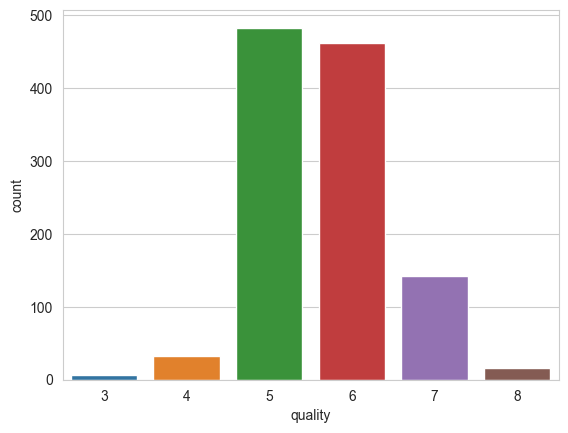

In [13]:
sns.set_style("whitegrid") 
sns.countplot(x="quality",data=df)

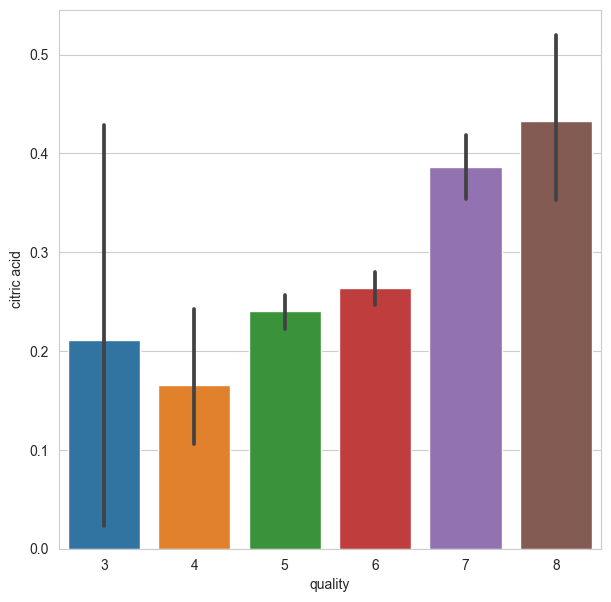

In [42]:
plt.subplots(figsize=(7,7))
sns.barplot(x="quality",y="citric acid",data=df,)
plt.show()

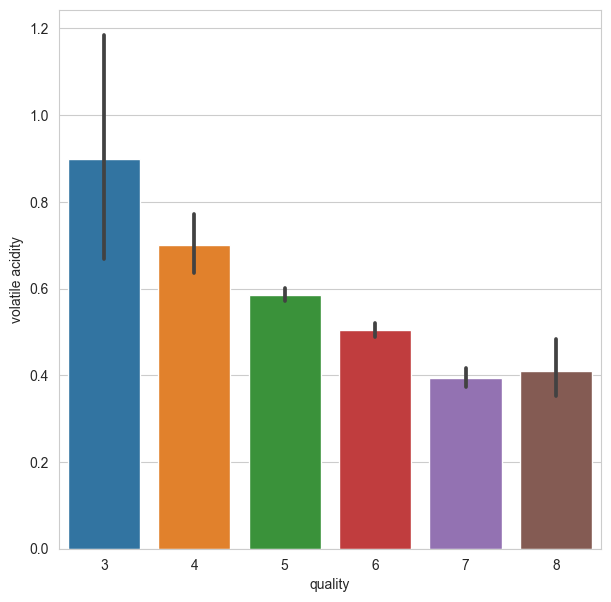

In [15]:
plt.subplots(figsize=(7,7))
sns.barplot(x="quality",y="volatile acidity",data=df)
plt.show()

# Pie Chart

In [16]:
#creating a pie chart for quality of wine
df.groupby('quality')['volatile acidity'].count()

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: volatile acidity, dtype: int64

([<matplotlib.patches.Wedge at 0x2650df51d90>,
 [Text(1.0998504237541227, 0.018139607710117012, '3'),
  Text(1.0915968662191418, 0.13570660138898635, '4'),
  Text(0.03174139087196111, 1.0995419428587132, '5'),
  Text(-0.5964380819791871, -0.9242627409806092, '6'),
  Text(0.9751878535138894, -0.50892892466333, '7'),
  Text(1.0989364914101254, -0.0483589479538551, '8')])

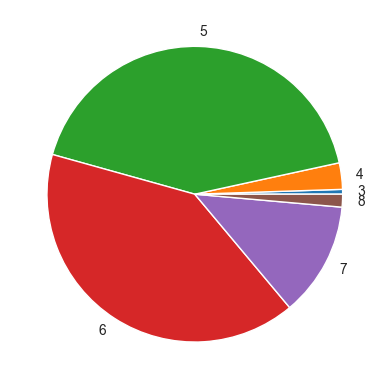

In [17]:
values=(6,33,483,462,143,16)
labels=('3','4','5','6','7','8')
plt.pie(values,labels=labels)

# Heatmap

<Axes: >

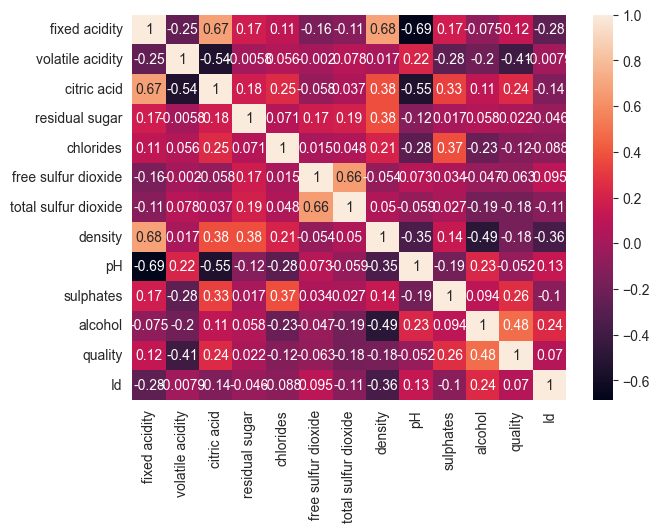

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

In [19]:
#dropping the unnecessary column
X=df.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

# Label Binarization

In [20]:
Y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


In [21]:
#Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

# Model Training

# Random Forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [23]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy of Random Forest Classifier : ',test_data_accuracy)

Accuracy of Random Forest Classifier :  0.8995633187772926


In [25]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(Y_test,X_test_prediction)

0.8260869565217391

In [26]:
recall_score(Y_test,X_test_prediction)

0.5

In [27]:
f1_score(Y_test,X_test_prediction)

0.6229508196721311

# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [29]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [30]:
X_test_prediction=dt.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy of Decison Tree Classifier : ',test_data_accuracy)

Accuracy of Decison Tree Classifier :  0.868995633187773


In [31]:
precision_score(Y_test,X_test_prediction)

0.625

In [32]:
recall_score(Y_test,X_test_prediction)

0.5263157894736842

In [33]:
f1_score(Y_test,X_test_prediction)

0.5714285714285714

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [35]:
LR.fit(X_train,Y_train)

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
X_test_prediction=LR.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy of Logistic Regression : ',test_data_accuracy)

Accuracy of Logistic Regression :  0.8733624454148472


In [37]:
precision_score(Y_test,X_test_prediction)

0.7647058823529411

In [38]:
recall_score(Y_test,X_test_prediction)

0.34210526315789475

In [39]:
f1_score(Y_test,X_test_prediction)

0.4727272727272727

# Accuracy of Different-Different Models

Text(0.5, 1.0, 'Accuracy of Different-Different Models')

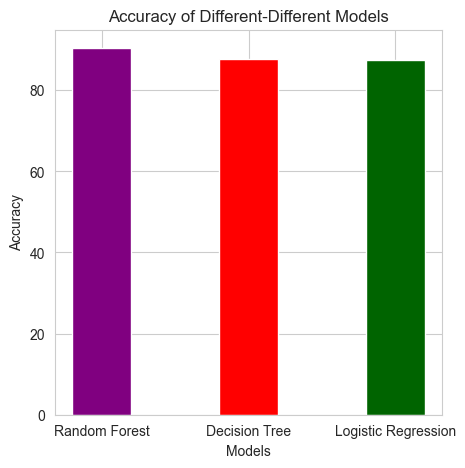

In [40]:
wine_data={'Random Forest':90.39,'Decision Tree':87.77,'Logistic Regression':87.33} 
model=list(wine_data.keys()) 
accuracy=list(wine_data.values())
plt.figure(figsize=(5,5))
barWidth=0.4
color=['purple','red','darkgreen']
label=['Random Forest','Decision Tree','Logistic Regression']
plt.bar(model,accuracy,color=color,width=barWidth,label=label)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different-Different Models')


# Results:

The accuracy of Random Forest is: 90.39%

The accuracy of Decision Tree is: 87.77%

The accuracy of Logistic Regression is: 87.33%



